In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils.periodic_images as periodic_images
from utils.utils import normalize_outbound_to_float64
from utils.experiments_functions import get_img_info_simple


### Textures

In [2]:
period = 20
images = {
    'vertical': periodic_images.vertical_stripes_texture(period=period),
    'horizontal': periodic_images.horizontal_stripes_texture(period=period),
    'checkerboard': periodic_images.checkerboard_texture(period=period),
    'diagonal': periodic_images.diagonal_lines_texture(period=period),
}

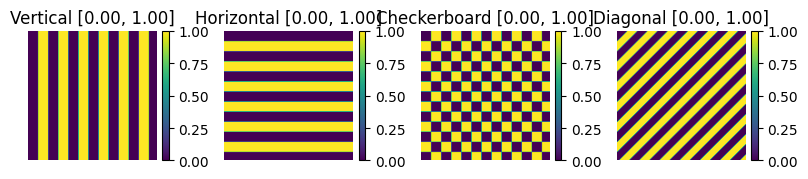

In [3]:
fig, axs = plt.subplots(1, 4, figsize=(8,5))
axs = axs.flatten()

for i, (key, img) in enumerate(images.items()):
    im = axs[i].imshow(img, cmap='viridis')
    axs[i].set_title(f"{key.replace('_', ' ').title()} [{img.min():.2f}, {img.max():.2f}]")
    axs[i].axis('off')
    fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [4]:
from utils.experiments_functions import get_img_info_simple
import pandas as pd

# Initialize an empty list to store the data
image_data_list = []

# Process each image
for key, image in images.items():
    info = get_img_info_simple(image, dx=6, dy=1)  # Using a fixed dx and dy for simplicity
    info['image_name'] = key
    image_data_list.append(info)

# Create a DataFrame from the collected data
image_data_df = pd.concat(image_data_list, ignore_index=True)

image_data_df

Smoothness  Curve structure   Entropy  Complexity  Shannon Entropy  \
0    0.666667         0.000000  0.084863    0.083214         0.084863   
1    0.666667         0.000000 -0.000000   -0.000000         0.000000   
2    0.664452        -0.002215  0.084863    0.083214         0.084863   
3    0.616840        -0.049827  0.087659    0.085939         0.087659   

   Fisher-Shannon Complexity    image_name  
0                   0.307114      vertical  
1                   1.000000    horizontal  
2                   0.307114  checkerboard  
3                   0.302409      diagonal

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine do

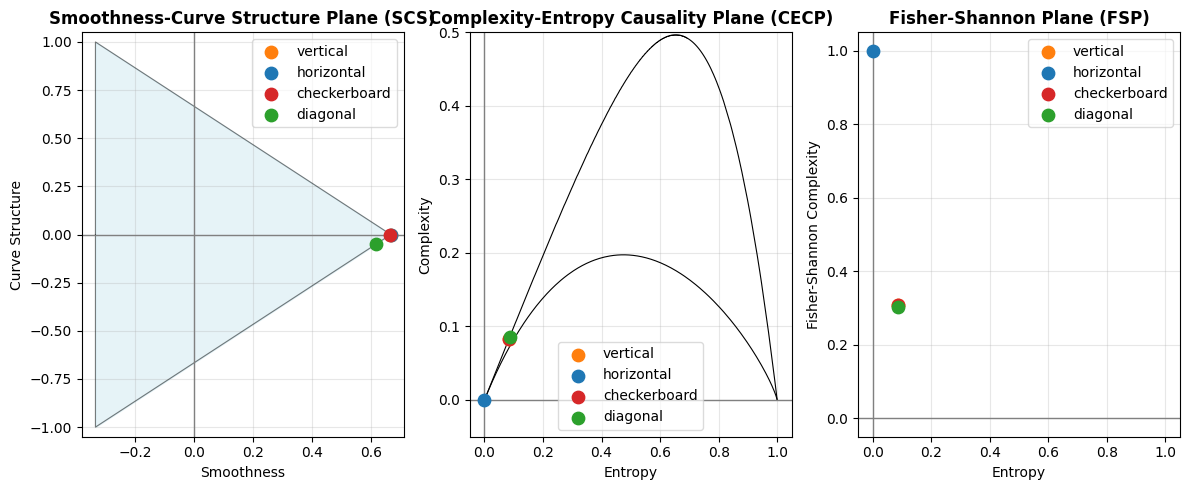

In [6]:
import matplotlib.pyplot as plt
from utils.utils import read_entropy_complexity_limits

# Define colors for each image
image_colors = {
    'horizontal': '#1f77b4',        # blue
    'vertical': '#ff7f0e',          # orange
    'diagonal': '#2ca02c',          # green
    'checkerboard': '#d62728',      # red
}

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Load CECP limits for the complexity-entropy plot
df_cont, df_troz = read_entropy_complexity_limits('data/limits/mv/', N=240)
df_cont, df_troz = read_entropy_complexity_limits('data/limits/unv/', N=720)

# Load SCSP limits for the smoothness-curve structure plot
df_scs = pd.read_csv('data/limits/SCSP/SCS_limits_steps1000.csv')

# Plot 1: SCS plane (Smoothness vs Curve Structure)
ax_scs = axes[0]
ax_scs.set_title('Smoothness-Curve Structure Plane (SCS)', fontweight='bold')
ax_scs.set_xlabel('Smoothness')
ax_scs.set_ylabel('Curve Structure')

# Plot 2: CECP plane (Entropy vs Complexity)
ax_cecp = axes[1]
ax_cecp.set_title('Complexity-Entropy Causality Plane (CECP)', fontweight='bold')
ax_cecp.set_xlabel('Entropy')
ax_cecp.set_ylabel('Complexity')

# Plot 3: FS plane (Shannon vs Fisher-Shannon Complexity)
ax_fsp = axes[2]
ax_fsp.set_title('Fisher-Shannon Plane (FSP)', fontweight='bold')
ax_fsp.set_xlabel('Entropy')
ax_fsp.set_ylabel('Fisher-Shannon Complexity')

# Add CECP superior and inferior limits to the CECP plot
ax_cecp.plot(df_cont['HT'], df_cont['CJT'], color='black', linewidth=0.8)
ax_cecp.plot(df_troz['HT'], df_troz['CJT'], color='black', linewidth=0.8)


# Add SCS limits to the SCS plot
ax_scs.plot(df_scs['Smoothness'], df_scs['Curve_Structure_Superior'], color='black', linewidth=0.8, alpha=0.5)
ax_scs.plot(df_scs['Smoothness'], df_scs['Curve_Structure_Inferior'], color='black', linewidth=0.8, alpha=0.5)
ax_scs.fill_between(df_scs['Smoothness'], df_scs['Curve_Structure_Inferior'], df_scs['Curve_Structure_Superior'], color='lightblue', alpha=0.3, 
            )

# Plot the data points for each image
for _, row in image_data_df.iterrows():
    image_name = row['image_name']
    color = image_colors[image_name]
    
    # Plot on SCS plane
    ax_scs.scatter(row['Smoothness'], row['Curve structure'], 
                  color=color, s=80, label=image_name, zorder=10)
    
    # Plot on CECP plane
    ax_cecp.scatter(row['Entropy'], row['Complexity'], 
                   color=color, s=80, label=image_name, zorder=10)
    
    # Plot on FSP plane
    ax_fsp.scatter(row['Shannon Entropy'], row['Fisher-Shannon Complexity'], 
                   color=color, s=80, label=image_name, zorder=10)

# Set reasonable axis limits with some buffer
ax_scs.set_xlim(-0.38, 0.71)
ax_scs.set_ylim(-1.05, 1.05)

ax_cecp.set_xlim(-0.05, 1.05)
ax_cecp.set_ylim(-0.05, 0.5)

ax_fsp.set_xlim(-0.05, 1.05)
ax_fsp.set_ylim(-0.05, 1.05)


# Add grid and reference lines to both plots
for ax in axes:
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, lw=1, color='gray')
    ax.axvline(x=0, lw=1, color='gray')
    ax.set_aspect('auto')
    ax.legend(loc='best', framealpha=0.7)

# Adjust layout and display
plt.tight_layout()
# plt.savefig('results/periodic_maps_analysis.png', bbox_inches='tight', dpi=300)
plt.show()


In [7]:
def plot_param_exploration(image_generator, param_name, param_values, fixed_params={}, title_prefix="", image_size=(128, 128)):
    fig, axes = plt.subplots(1, len(param_values), figsize=(3 * len(param_values), 3))
    if len(param_values) == 1:
        axes = [axes]

    for ax, val in zip(axes, param_values):
        params = fixed_params.copy()
        params[param_name] = val
        image = image_generator(image_size=image_size, **params)
        ax.imshow(image, cmap="viridis", origin="lower")
        ax.set_title(f"{param_name}={val}", fontsize=10)
        ax.axis("off")

    fig.suptitle(title_prefix, fontsize=14)
    plt.tight_layout()
    plt.show()

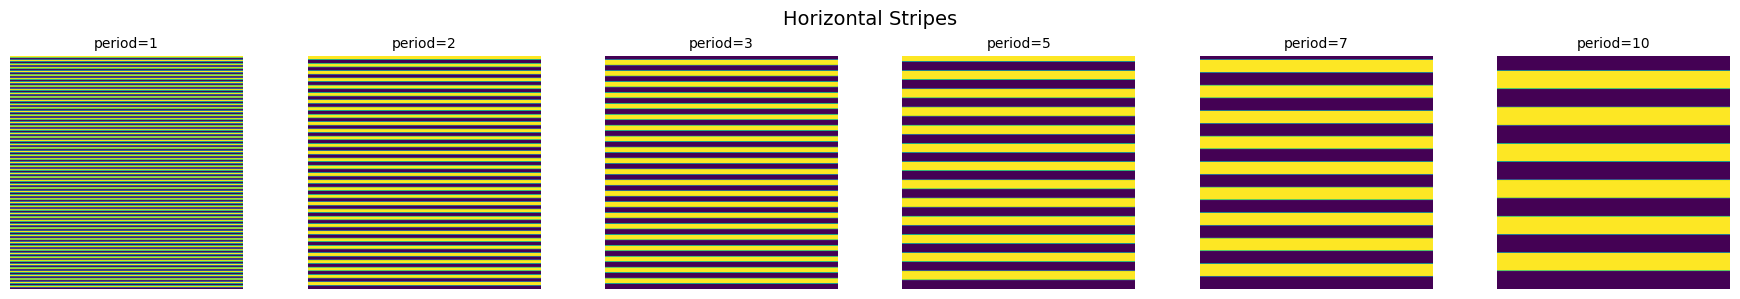

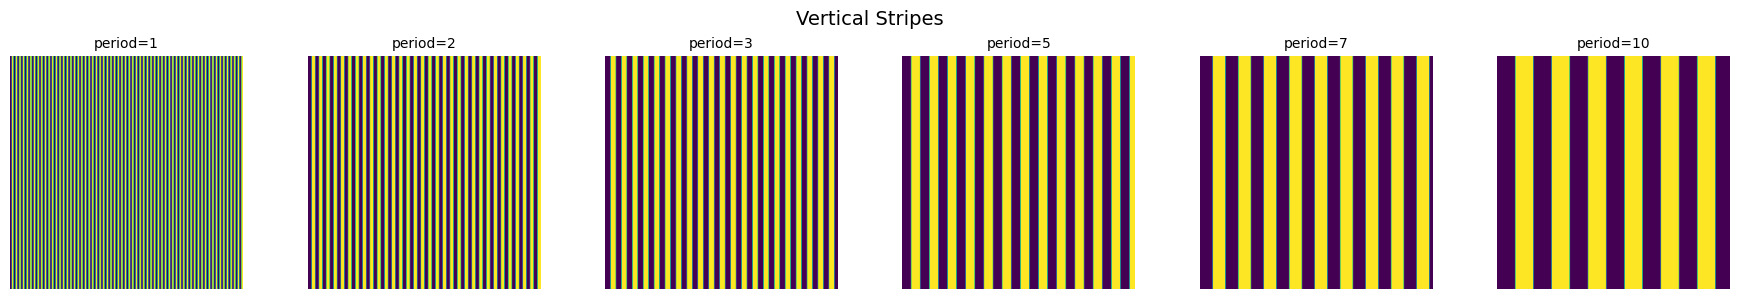

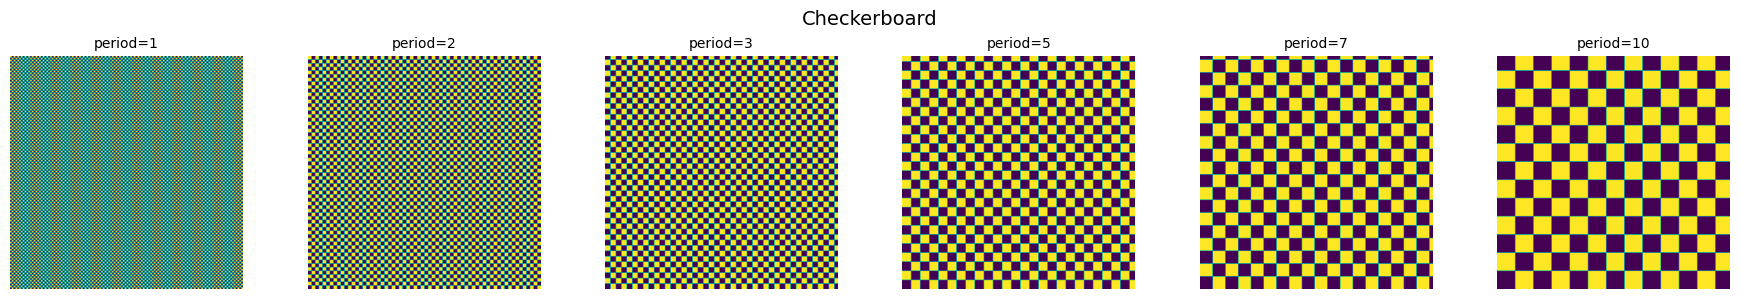

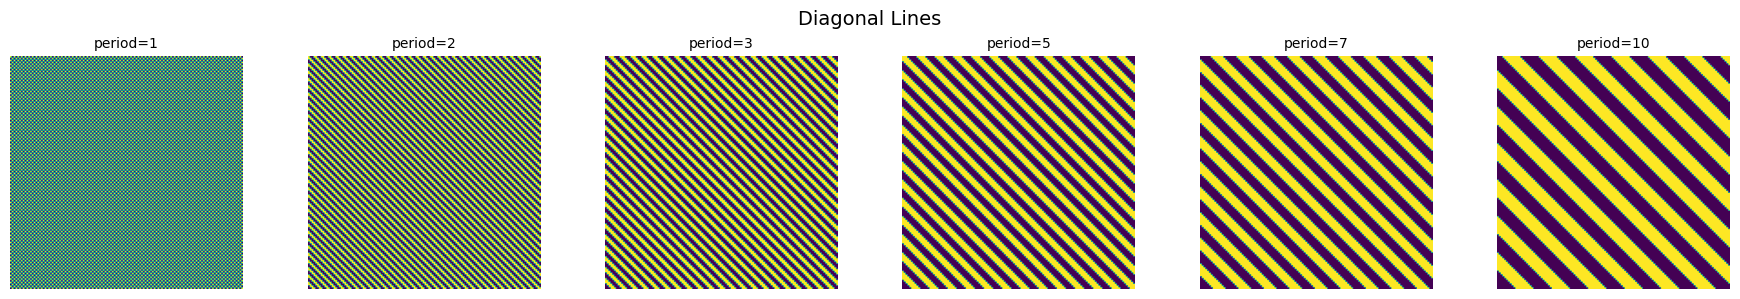

In [8]:
period_values = [1, 2, 3, 5, 7, 10]
plot_param_exploration(periodic_images.horizontal_stripes_texture, "period", period_values, {}, "Horizontal Stripes")
plot_param_exploration(periodic_images.vertical_stripes_texture, "period", period_values, {}, "Vertical Stripes")
plot_param_exploration(periodic_images.checkerboard_texture, "period", period_values, {}, "Checkerboard")
plot_param_exploration(periodic_images.diagonal_lines_texture, "period", period_values, {}, "Diagonal Lines")


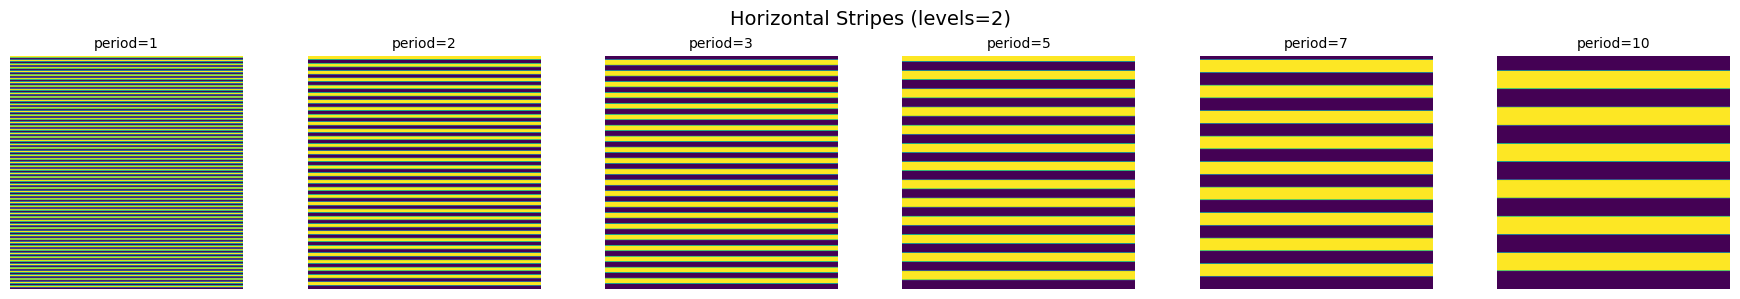

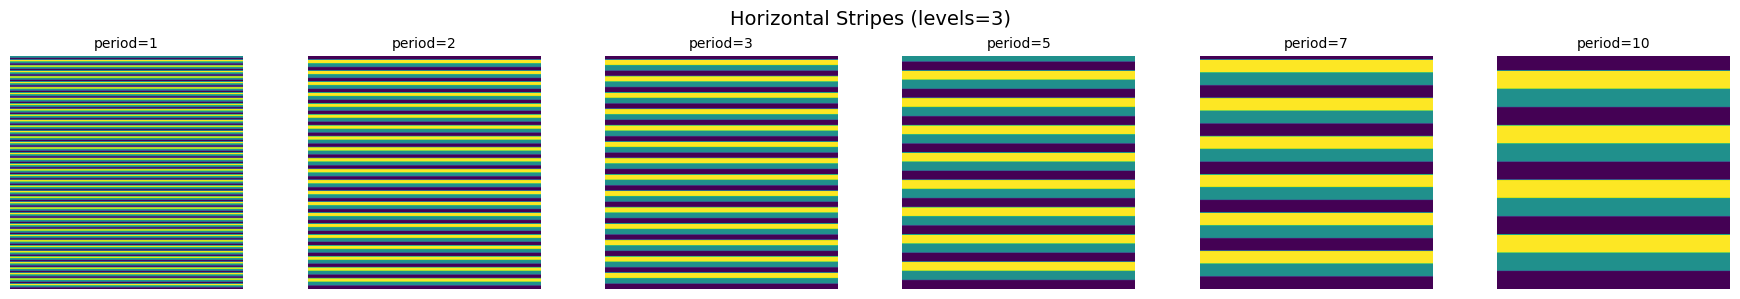

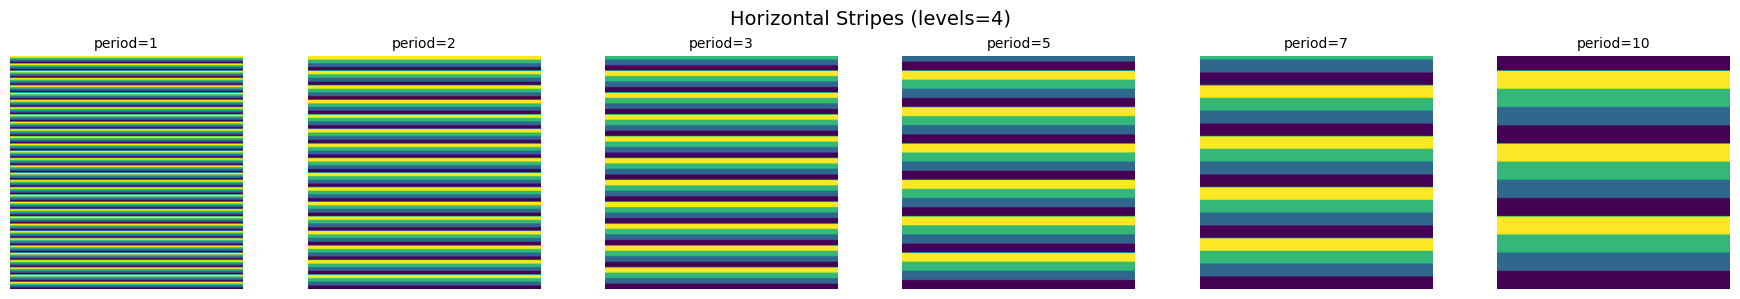

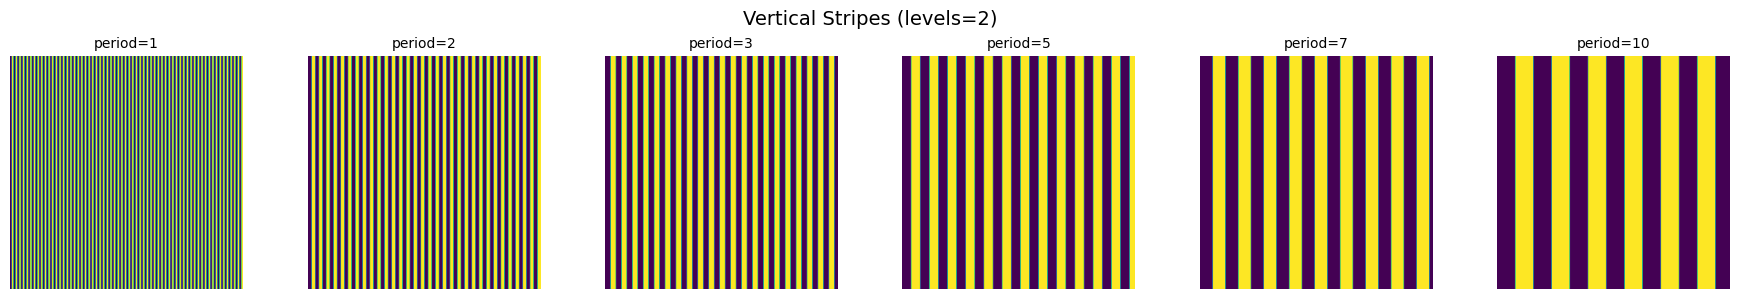

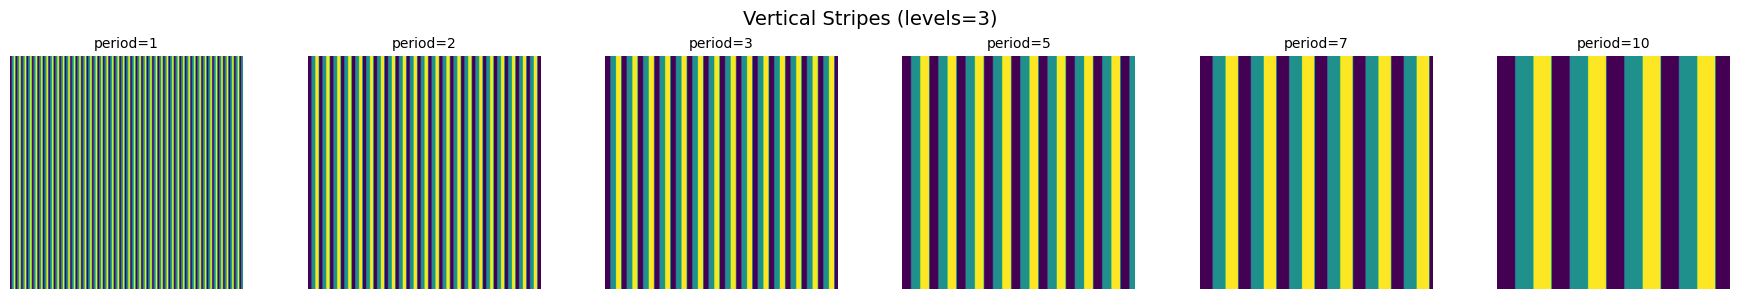

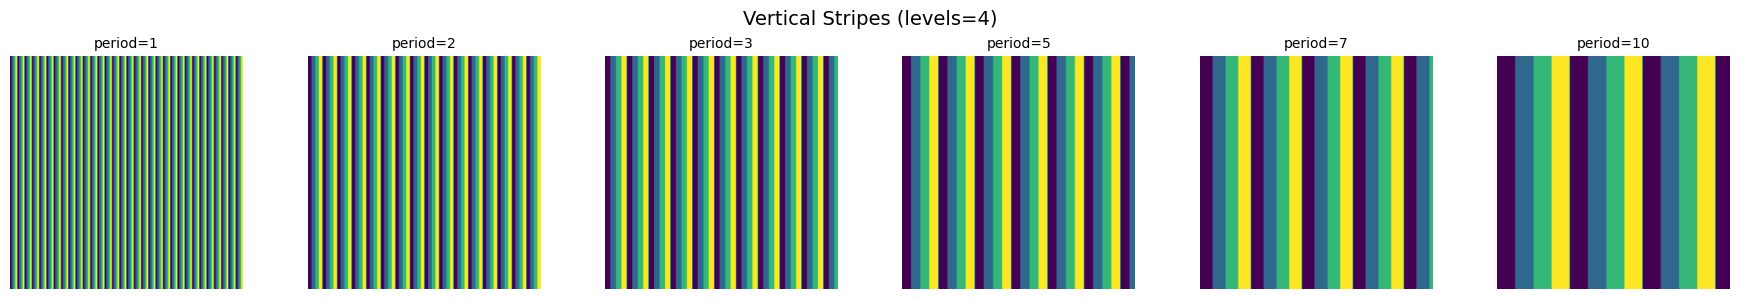

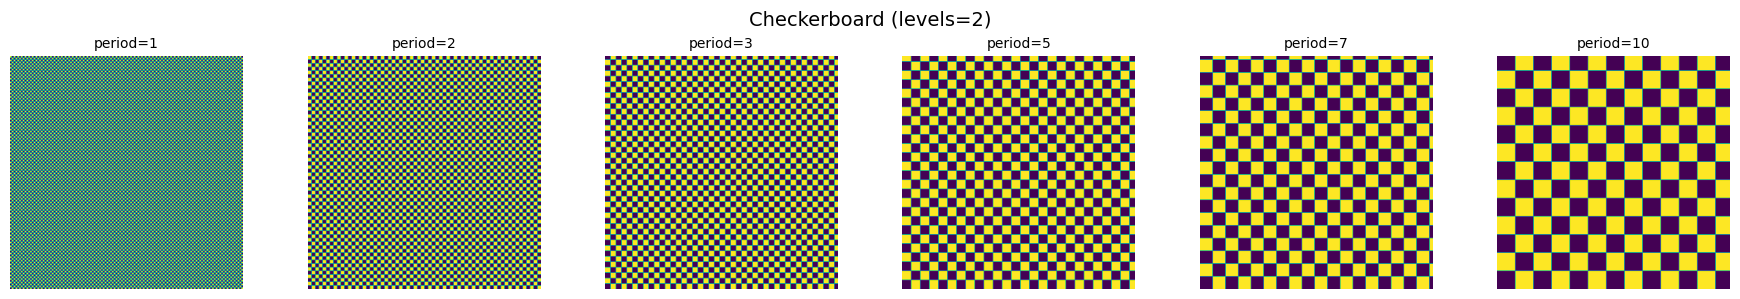

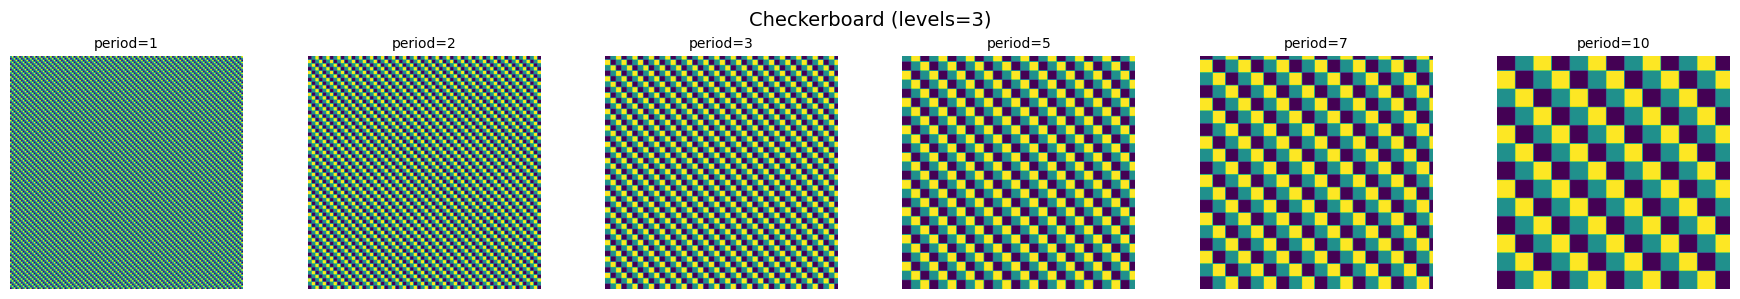

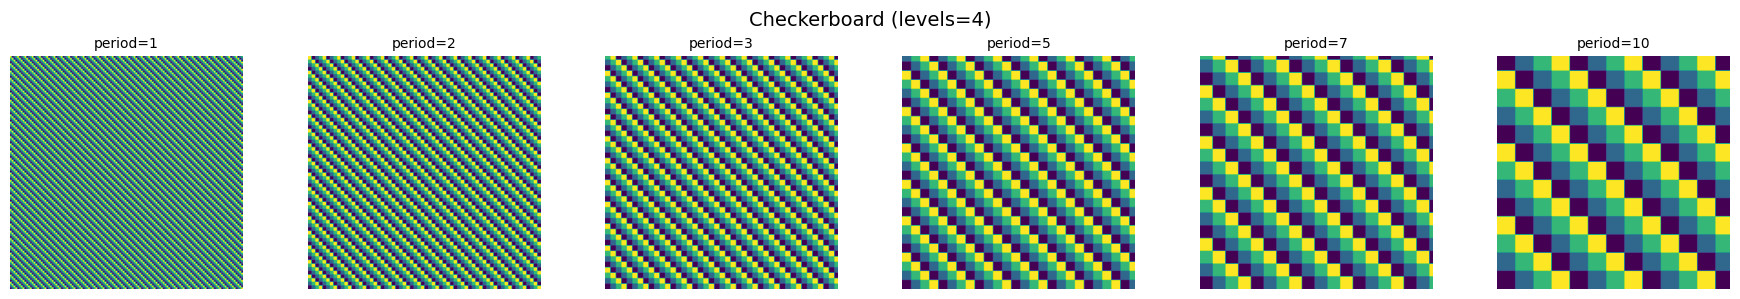

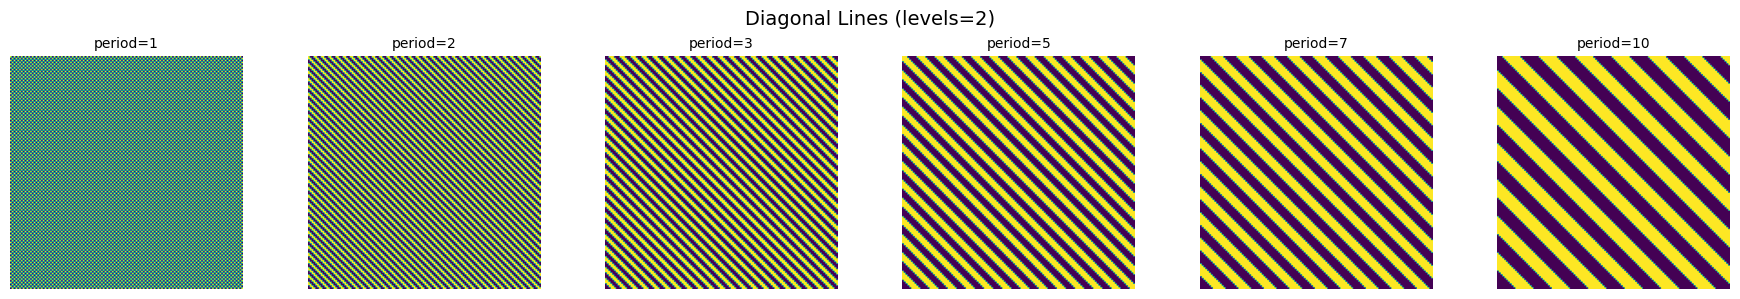

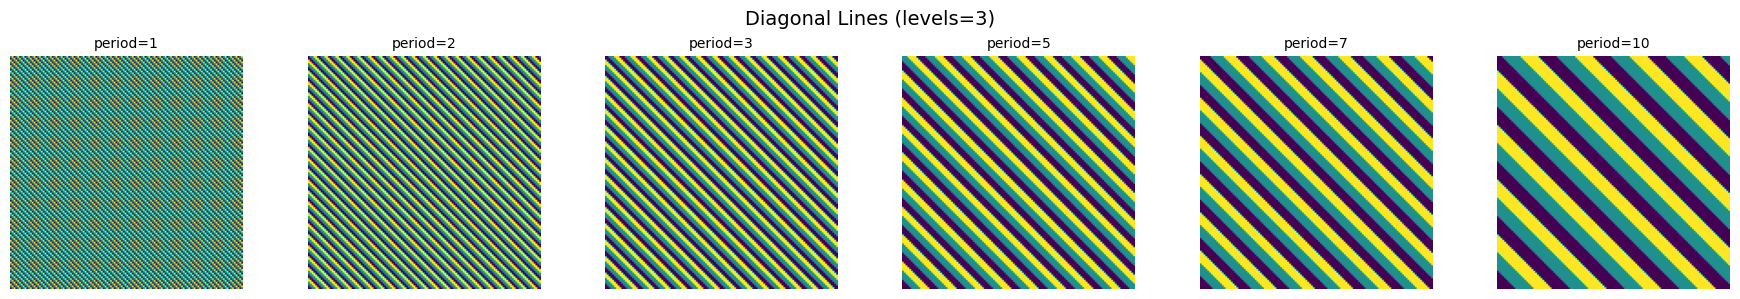

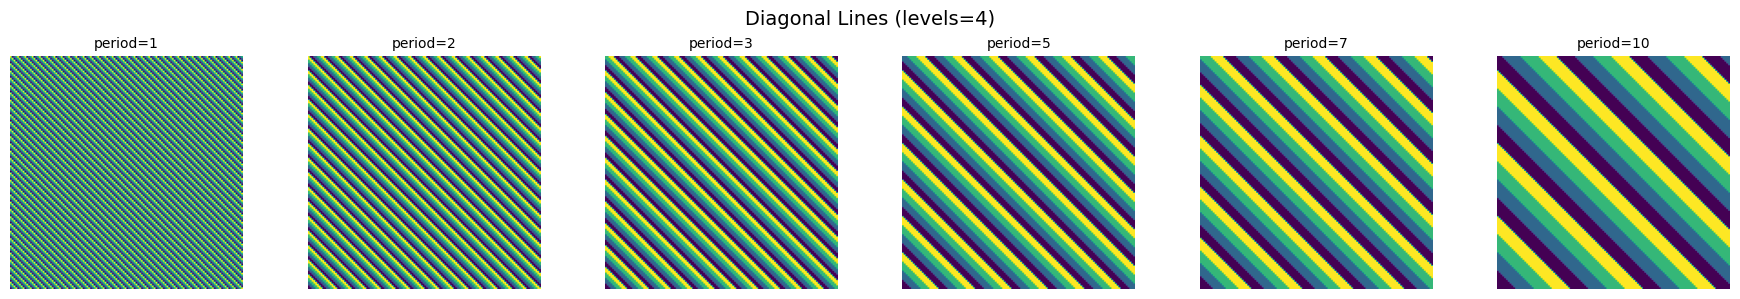

In [9]:
period_values = [1, 2, 3, 5, 7, 10]
level_values = [2, 3, 4]

# Texture configs
periodic_configs = [
    ("Horizontal Stripes", periodic_images.horizontal_stripes_texture, "period"),
    ("Vertical Stripes", periodic_images.vertical_stripes_texture, "period"),
    ("Checkerboard", periodic_images.checkerboard_texture, "period"),
    ("Diagonal Lines", periodic_images.diagonal_lines_texture, "period")
]

# Loop through each function and each levels value
for title_prefix, func, param_name in periodic_configs:
    for levels in level_values:
        fixed_params = {"levels": levels}
        full_title = f"{title_prefix} (levels={levels})"
        plot_param_exploration(func, param_name, period_values, fixed_params, full_title, image_size=(128, 128))

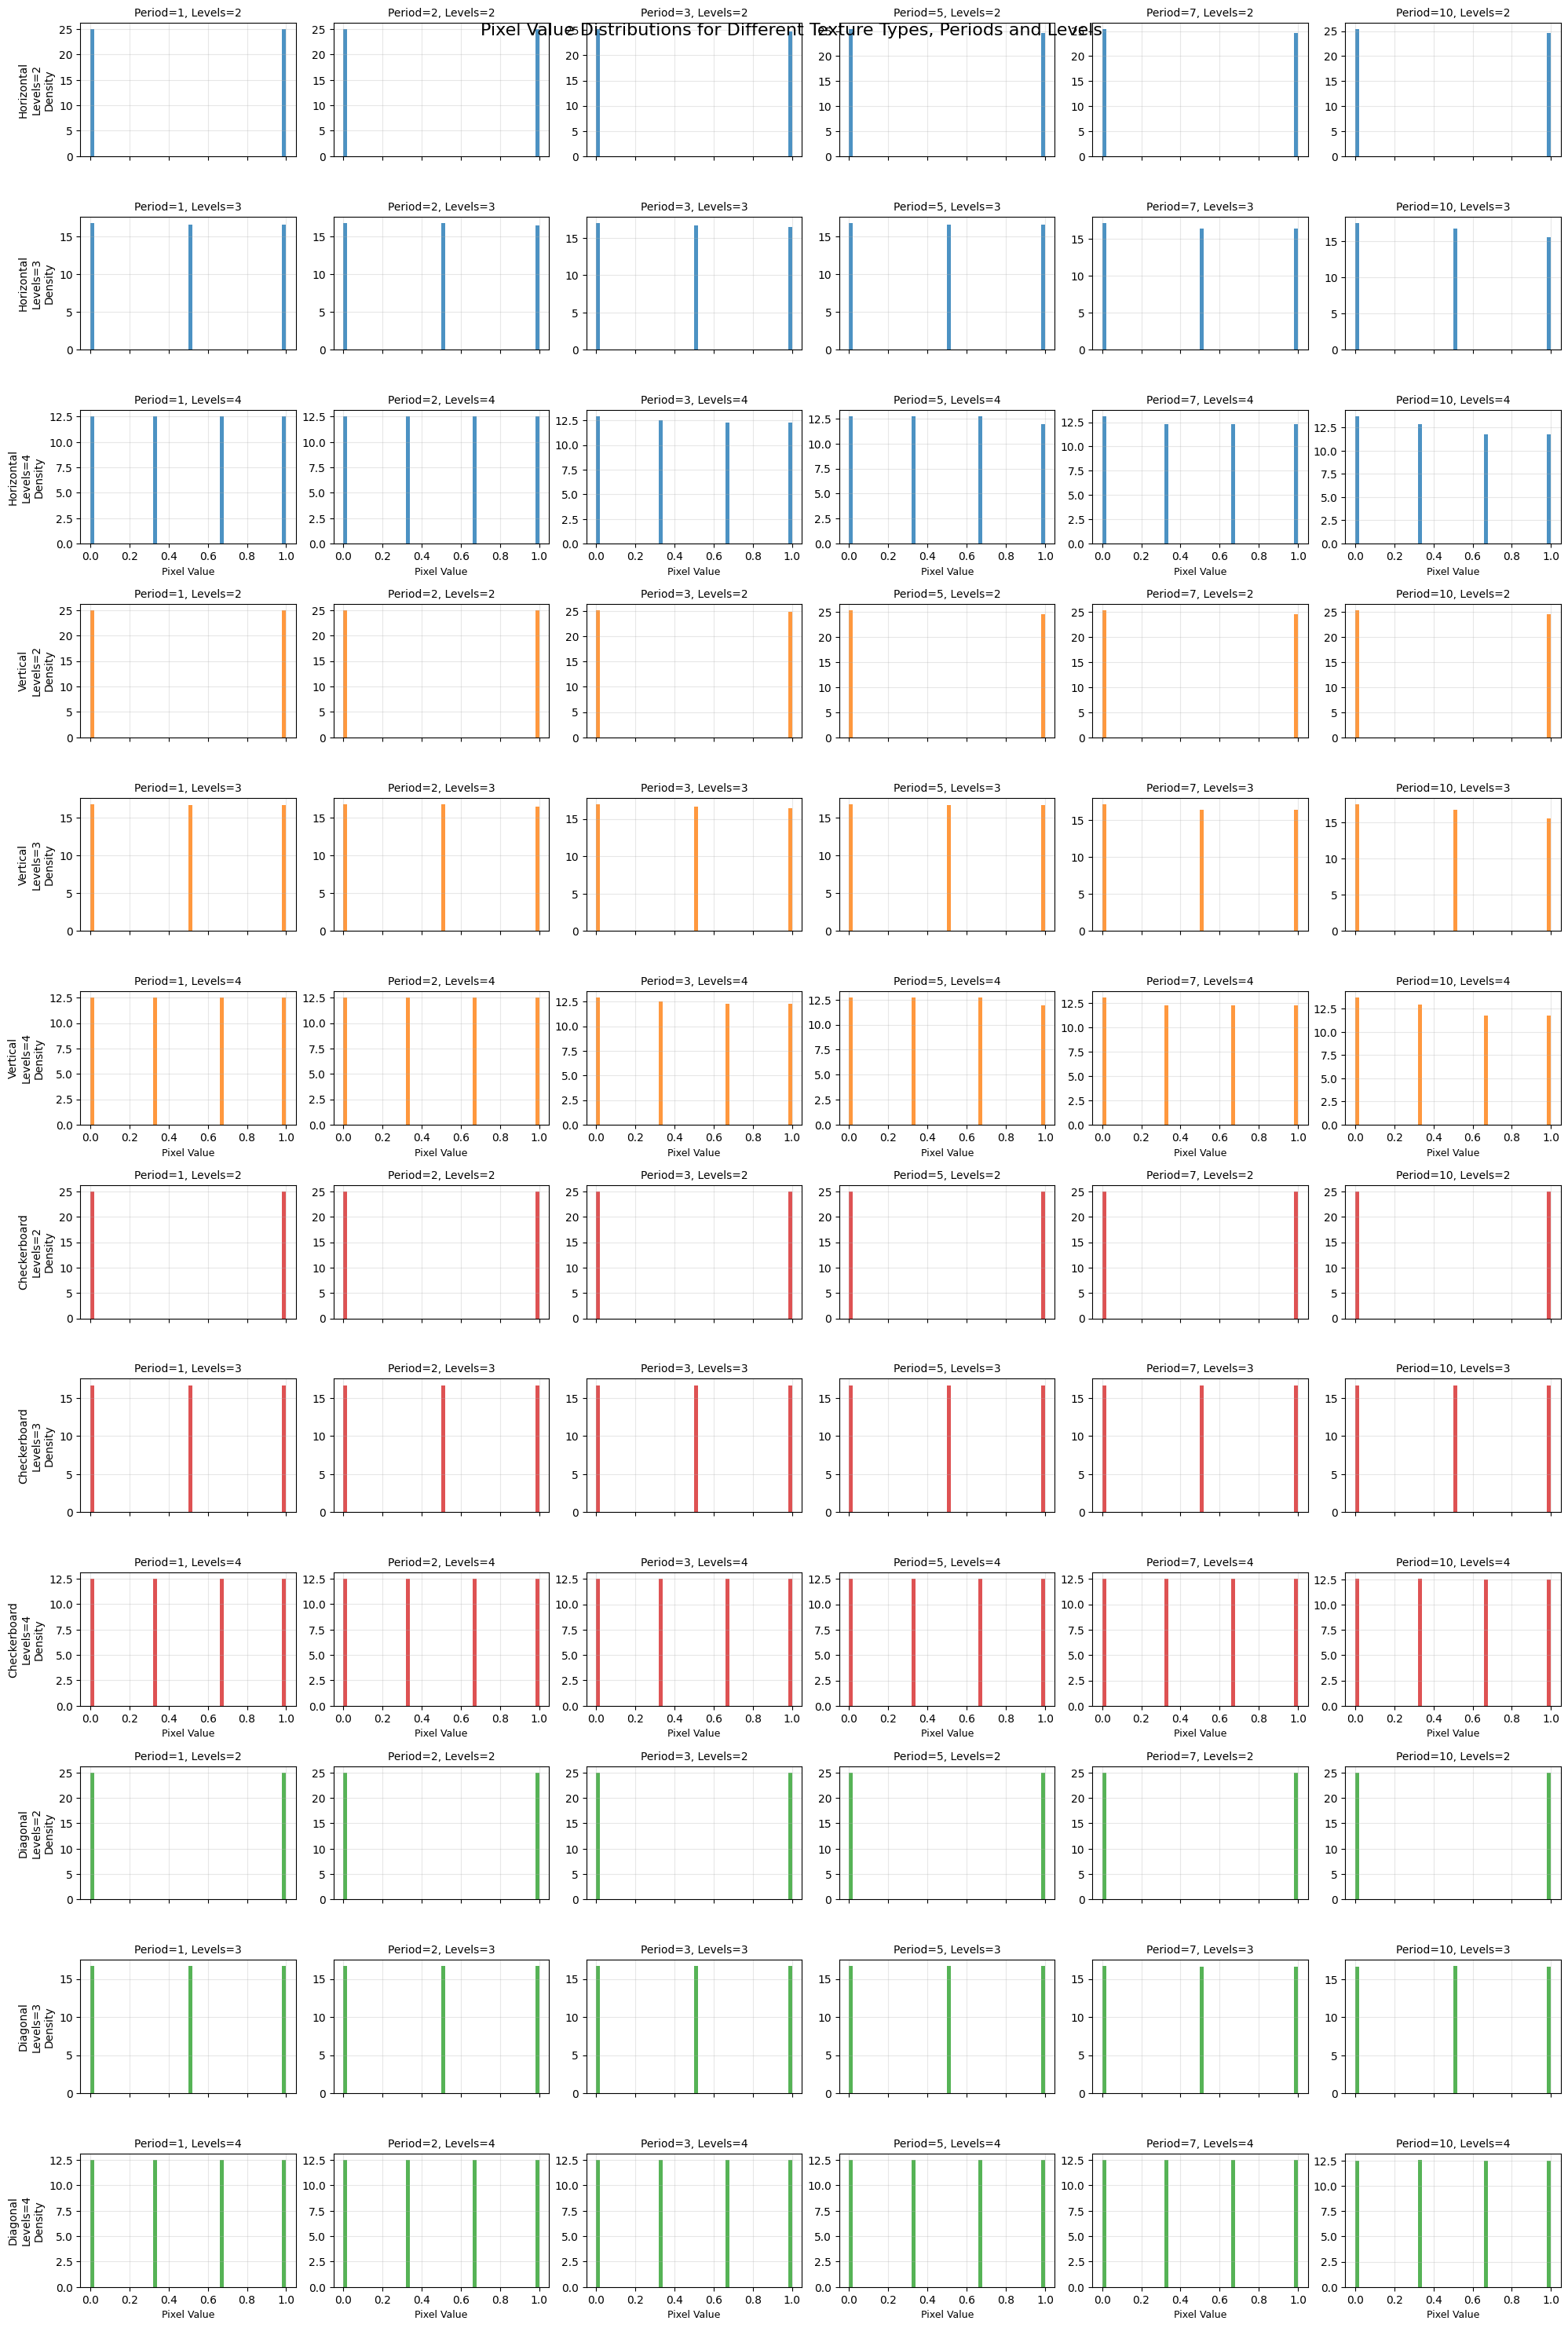

In [10]:
period_values = [1, 2, 3, 5, 7, 10]

configs = [
    ("horizontal", periodic_images.horizontal_stripes_texture, "period", period_values, {"levels": 2}),
    ("horizontal", periodic_images.horizontal_stripes_texture, "period", period_values, {"levels": 3}),
    ("horizontal", periodic_images.horizontal_stripes_texture, "period", period_values, {"levels": 4}),
    ("vertical", periodic_images.vertical_stripes_texture, "period", period_values, {"levels": 2}),
    ("vertical", periodic_images.vertical_stripes_texture, "period", period_values, {"levels": 3}),
    ("vertical", periodic_images.vertical_stripes_texture, "period", period_values, {"levels": 4}),
    ("checkerboard", periodic_images.checkerboard_texture, "period", period_values, {"levels": 2}),
    ("checkerboard", periodic_images.checkerboard_texture, "period", period_values, {"levels": 3}),
    ("checkerboard", periodic_images.checkerboard_texture, "period", period_values, {"levels": 4}),
    ("diagonal", periodic_images.diagonal_lines_texture, "period", period_values, {"levels": 2}),
    ("diagonal", periodic_images.diagonal_lines_texture, "period", period_values, {"levels": 3}),
    ("diagonal", periodic_images.diagonal_lines_texture, "period", period_values, {"levels": 4})
]
import matplotlib.pyplot as plt

# Create figure with 12 rows (all texture configs) and 6 columns (one for each period value)
fig, axes = plt.subplots(12, 6, figsize=(20, 30))

# For each texture configuration
for row_idx, (texture_name, texture_func, param_name, param_values, fixed_params) in enumerate(configs):
    # Get the levels value for this configuration
    levels = fixed_params.get("levels", 2)
    
    # For each period value
    for col_idx, period_val in enumerate(param_values):
        # Generate the image with the specified period and levels
        img = texture_func(period=period_val, image_size=(256, 256), levels=levels)
        
        # Plot histogram in the corresponding subplot
        ax = axes[row_idx, col_idx]
        ax.hist(img.flatten(), bins=50, color=image_colors[texture_name], 
                alpha=0.8, density=True)
        
        # Set title including the period and levels
        if row_idx % 3 == 0 and col_idx == 0:
            texture_title = f"{texture_name.capitalize()}"
        elif col_idx == 0:
            texture_title = ""
        else:
            texture_title = ""
            
        ax.set_title(f"Period={period_val}, Levels={levels}", fontsize=10)
            
        # Set y-label only for the leftmost column
        if col_idx == 0:
            ax.set_ylabel(f"{texture_name.capitalize()}\nLevels={levels}\nDensity", fontsize=10)
            
        # Remove x-ticks for all but the bottom row in each texture group
        if row_idx % 3 != 2:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel('Pixel Value', fontsize=9)
            
        ax.grid(alpha=0.3)

# Add a main title
fig.suptitle('Pixel Value Distributions for Different Texture Types, Periods and Levels', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.98)  # Make room for the suptitle
plt.show()

In [11]:
period_values = [1, 2, 3, 5, 7, 10]

configs = [
    ("horizontal", periodic_images.horizontal_stripes_texture, "period", period_values, {"levels": 2}),
    ("horizontal", periodic_images.horizontal_stripes_texture, "period", period_values, {"levels": 3}),
    ("horizontal", periodic_images.horizontal_stripes_texture, "period", period_values, {"levels": 4}),
    ("vertical", periodic_images.vertical_stripes_texture, "period", period_values, {"levels": 2}),
    ("vertical", periodic_images.vertical_stripes_texture, "period", period_values, {"levels": 3}),
    ("vertical", periodic_images.vertical_stripes_texture, "period", period_values, {"levels": 4}),
    ("checkerboard", periodic_images.checkerboard_texture, "period", period_values, {"levels": 2}),
    ("checkerboard", periodic_images.checkerboard_texture, "period", period_values, {"levels": 3}),
    ("checkerboard", periodic_images.checkerboard_texture, "period", period_values, {"levels": 4}),
    ("diagonal", periodic_images.diagonal_lines_texture, "period", period_values, {"levels": 2}),
    ("diagonal", periodic_images.diagonal_lines_texture, "period", period_values, {"levels": 3}),
    ("diagonal", periodic_images.diagonal_lines_texture, "period", period_values, {"levels": 4})
]
image_data_list = []
# Loop and call f for each image
for type_name, func, param_name, param_list, fixed_params in configs:
    for val in param_list:
        kwargs = fixed_params.copy()
        kwargs[param_name] = val
        image = func(**kwargs, image_size=(256, 256))
        info = get_img_info_simple(image, dx=6, dy=1)
        info['image_name'] = type_name
        info['param_name'] = param_name
        info['param_value'] = val
        # Store the levels parameter value as well
        info['levels'] = fixed_params.get('levels', 2)
        image_data_list.append(info)
        
        
# Create a DataFrame from the collected data
image_data_df = pd.concat(image_data_list, ignore_index=True)

image_data_df.head(10)

Smoothness  Curve structure  Entropy  Complexity  Shannon Entropy  \
0    0.666667              0.0     -0.0        -0.0              0.0   
1    0.666667              0.0     -0.0        -0.0              0.0   
2    0.666667              0.0     -0.0        -0.0              0.0   
3    0.666667              0.0     -0.0        -0.0              0.0   
4    0.666667              0.0     -0.0        -0.0              0.0   
5    0.666667              0.0     -0.0        -0.0              0.0   
6    0.666667              0.0     -0.0        -0.0              0.0   
7    0.666667              0.0     -0.0        -0.0              0.0   
8    0.666667              0.0     -0.0        -0.0              0.0   
9    0.666667              0.0     -0.0        -0.0              0.0   

   Fisher-Shannon Complexity  image_name param_name  param_value  levels  
0                        1.0  horizontal     period            1       2  
1                        1.0  horizontal     period            2       2  
2                        1.0  horizontal     period            3       2  
3                        1.0  horizontal     period            5       2  
4                        1.0  horizontal     period            7       2  
5                        1.0  horizontal     period           10       2  
6                        1.0  horizontal     period            1       3  
7                        1.0  horizontal     period            2       3  
8                        1.0  horizontal     period            3       3  
9                        1.0  horizontal     period            5       3

In [12]:
# Filter the dataframe to show only rows where image_name is 'checkerboard'
checkerboard_data = image_data_df[image_data_df['image_name'] == 'checkerboard']
display(checkerboard_data)

Smoothness  Curve structure   Entropy  Complexity  Shannon Entropy  \
36   -0.333333        -1.000000  0.105354    0.104695         0.105354   
37    0.418624        -0.248043  0.210706    0.207046         0.210706   
38    0.555556        -0.111111  0.272332    0.264863         0.272332   
39    0.626667        -0.040000  0.227655    0.221743         0.227655   
40    0.646736        -0.019931  0.186224    0.181655         0.186224   
41    0.657055        -0.009612  0.146152    0.142806         0.146152   
42    0.000000        -0.666667  0.166981    0.164981         0.166981   
43    0.501315        -0.165352  0.272334    0.264864         0.272334   
44    0.592603        -0.074064  0.240219    0.233883         0.240219   
45    0.640000        -0.026667  0.178271    0.173951         0.178271   
46    0.653379        -0.013287  0.141489    0.138280         0.141489   
47    0.660269        -0.006398  0.108724    0.106443         0.108724   
48    0.166659        -0.500008  0.210707    0.207048         0.210707   
49    0.542637        -0.124029  0.253359    0.246569         0.253359   
50    0.611119        -0.055548  0.205055    0.199886         0.205055   
51    0.646659        -0.020008  0.146568    0.143210         0.146568   
52    0.656701        -0.009965  0.114841    0.112392         0.114841   
53    0.661869        -0.004798  0.087407    0.085693         0.087407   

    Fisher-Shannon Complexity    image_name param_name  param_value  levels  
36               0.000000e+00  checkerboard     period            1       2  
37               3.968207e-06  checkerboard     period            2       2  
38               5.965322e-06  checkerboard     period            3       2  
39               7.665327e-02  checkerboard     period            5       2  
40               1.448204e-01  checkerboard     period            7       2  
41               2.071098e-01  checkerboard     period           10       2  
42               1.816508e-10  checkerboard     period            1       3  
43               5.250338e-06  checkerboard     period            2       3  
44               5.613145e-02  checkerboard     period            3       3  
45               1.561645e-01  checkerboard     period            5       3  
46               2.162337e-01  checkerboard     period            7       3  
47               2.675311e-01  checkerboard     period           10       3  
48               0.000000e+00  checkerboard     period            1       4  
49               3.378591e-02  checkerboard     period            2       4  
50               1.135409e-01  checkerboard     period            3       4  
51               2.067367e-01  checkerboard     period            5       4  
52               2.591498e-01  checkerboard     period            7       4  
53               3.028331e-01  checkerboard     period           10       4

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine do

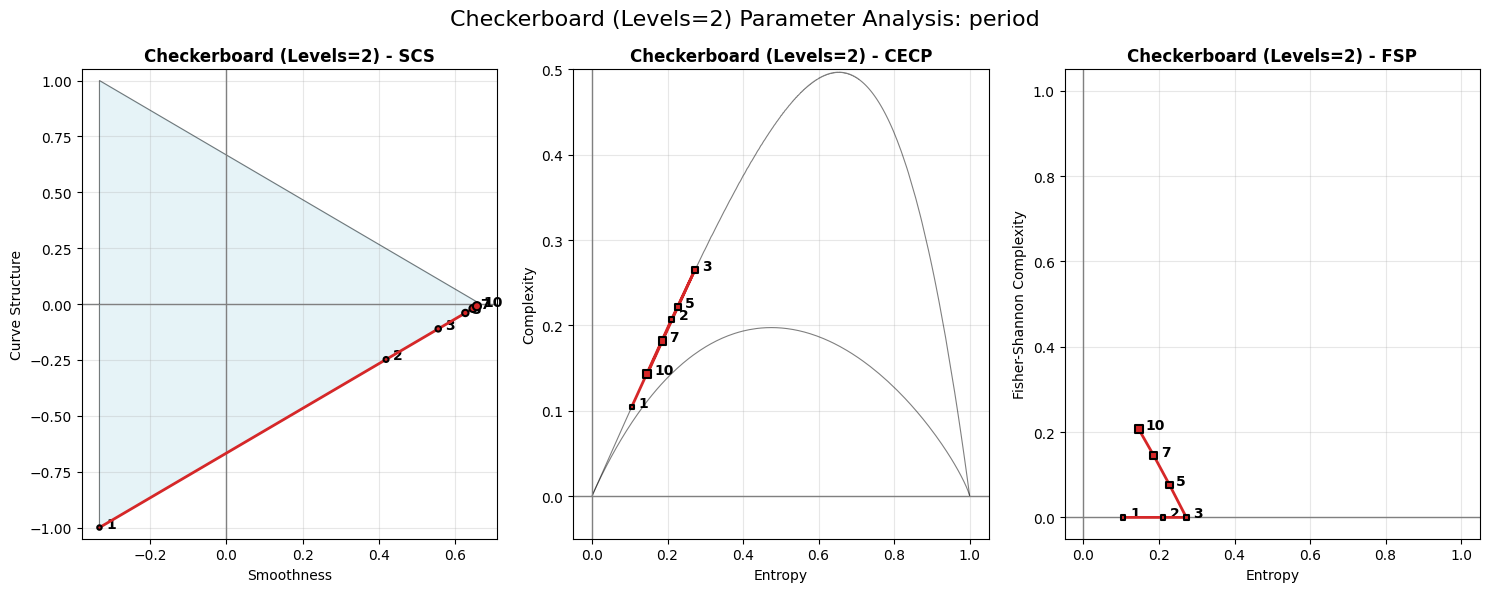

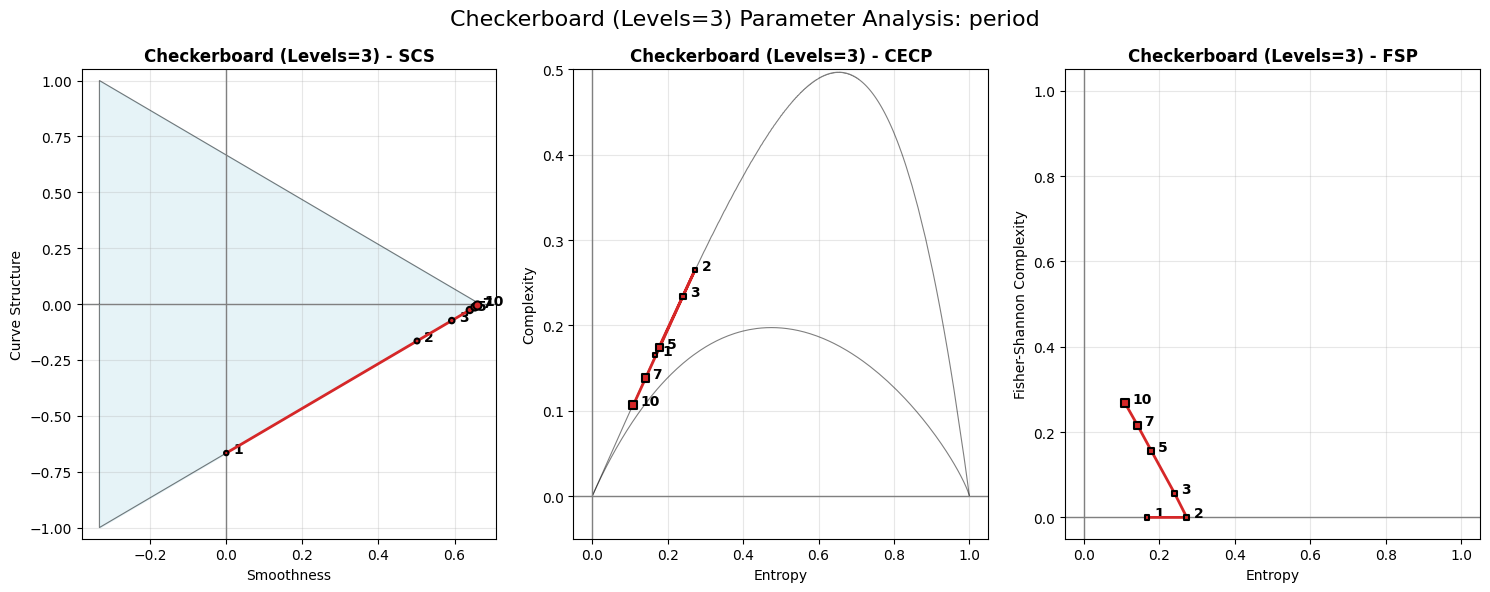

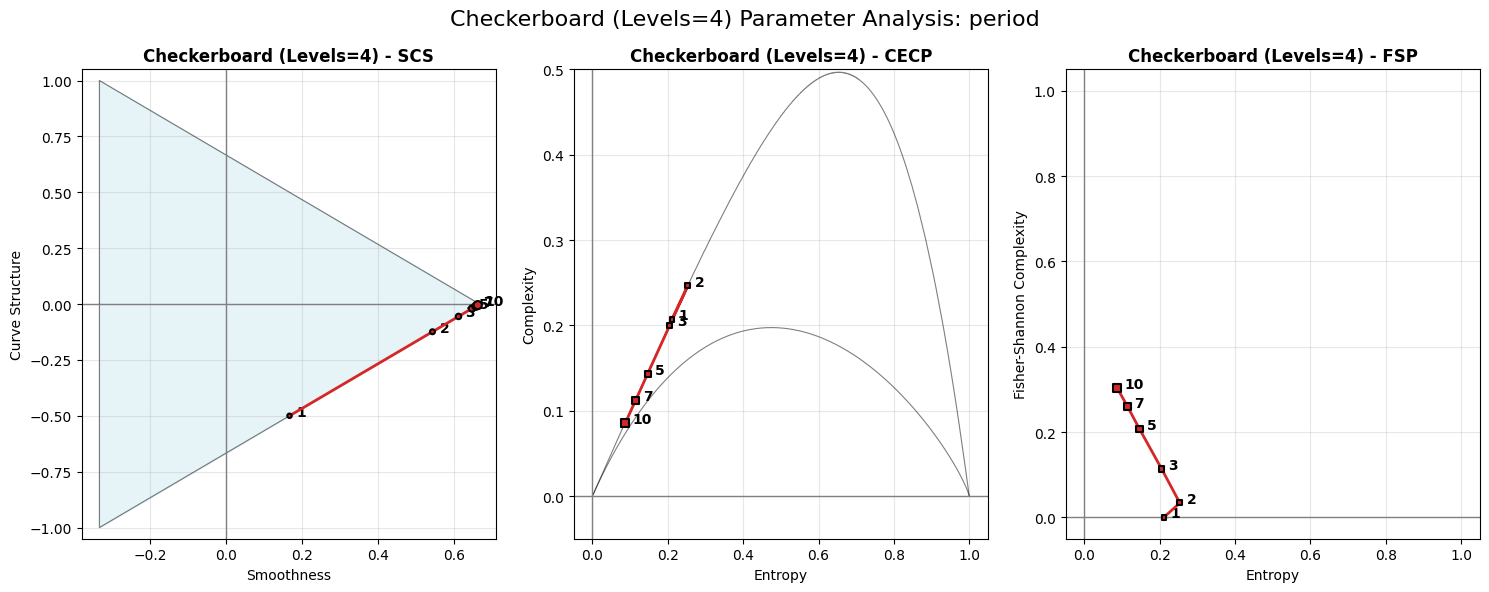

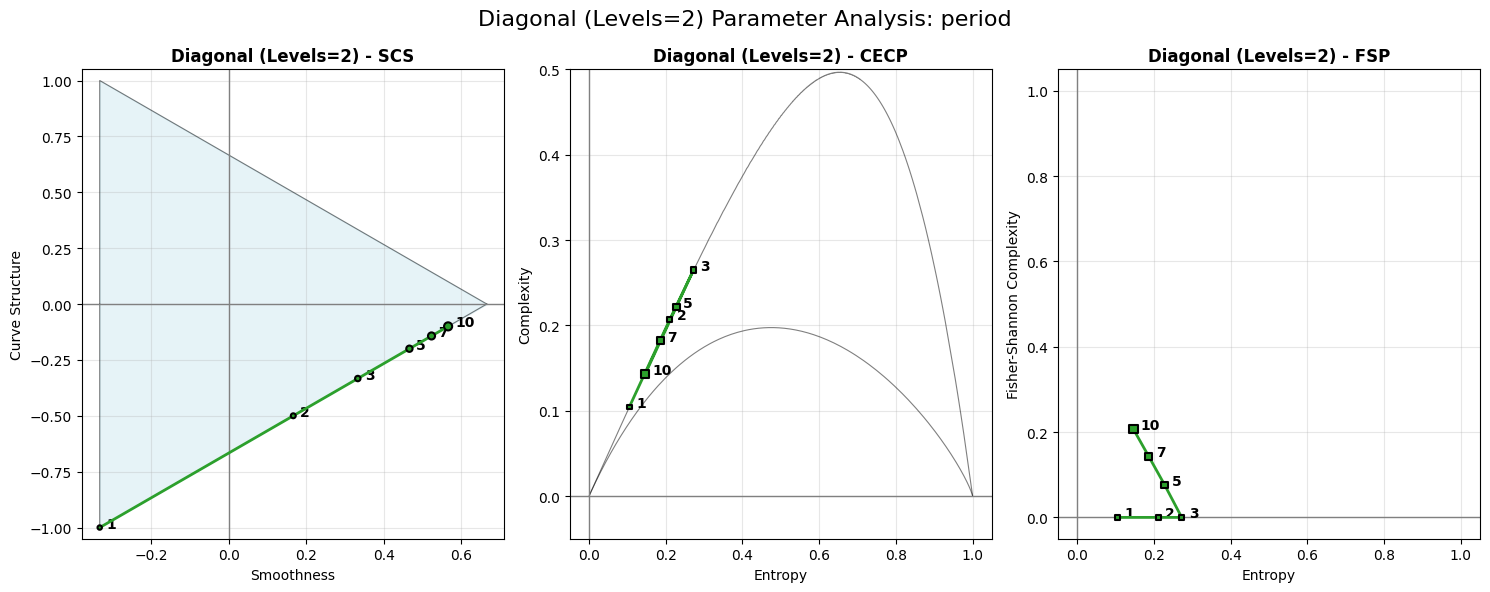

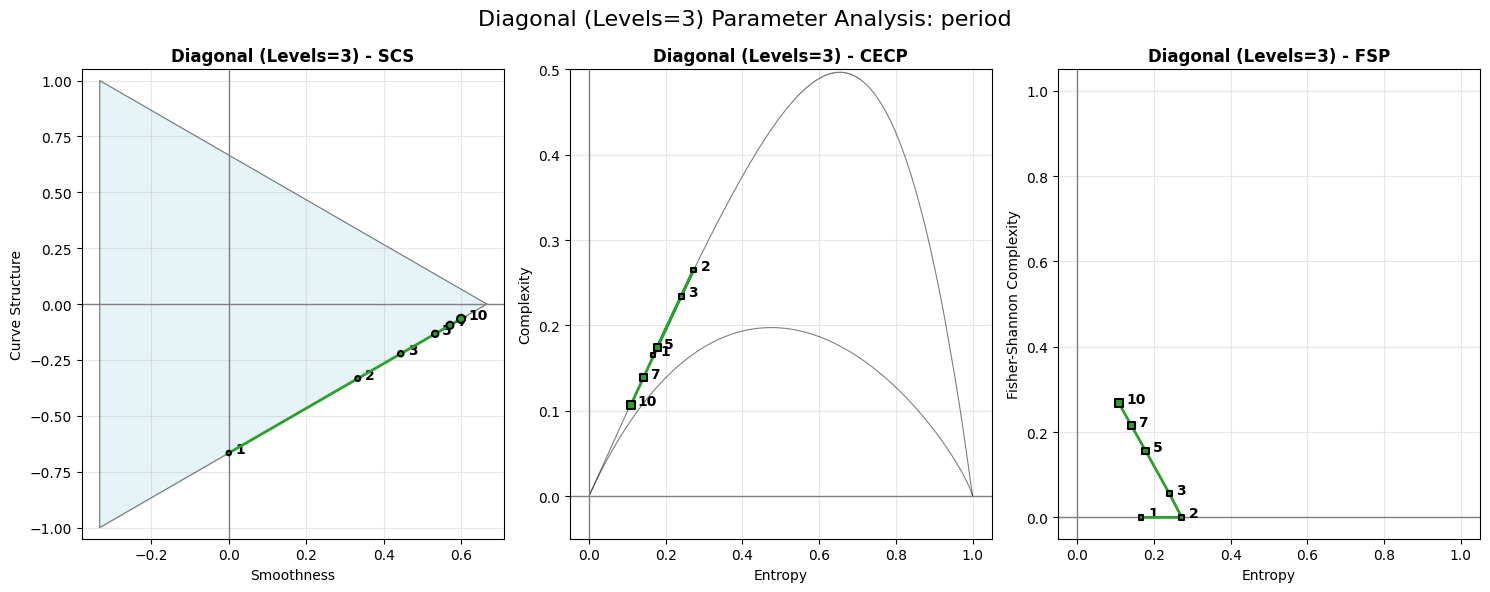

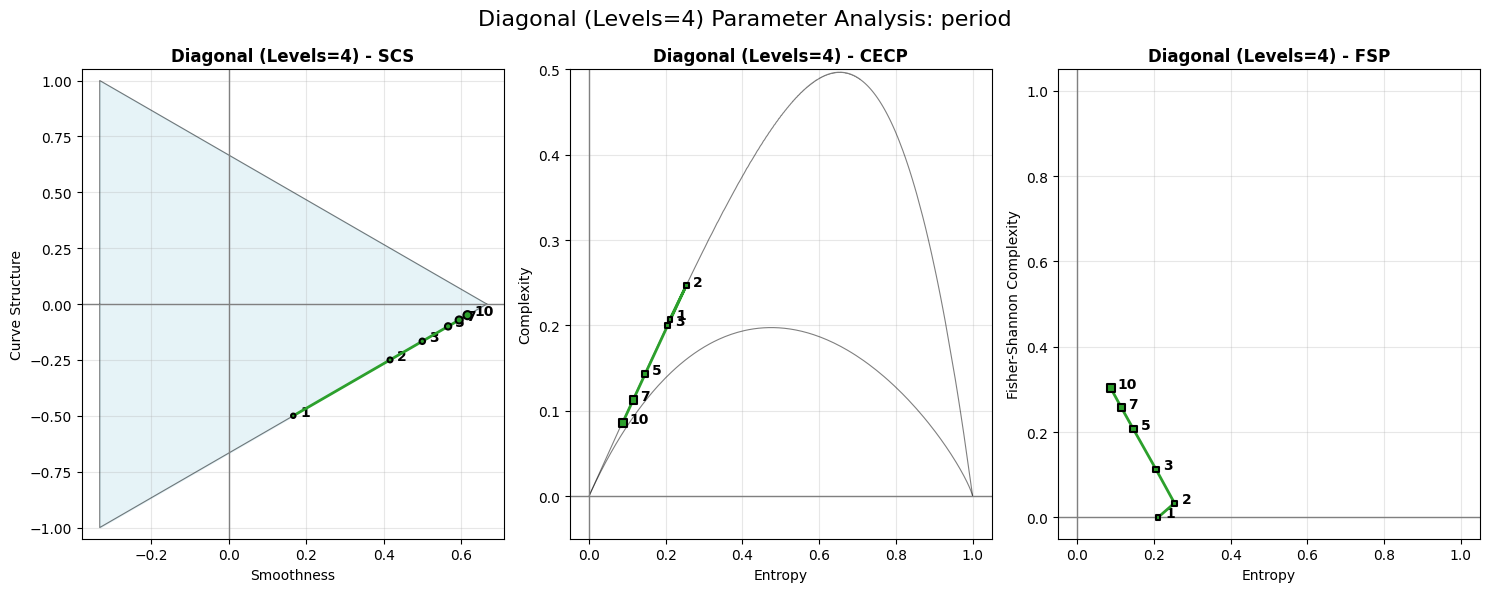

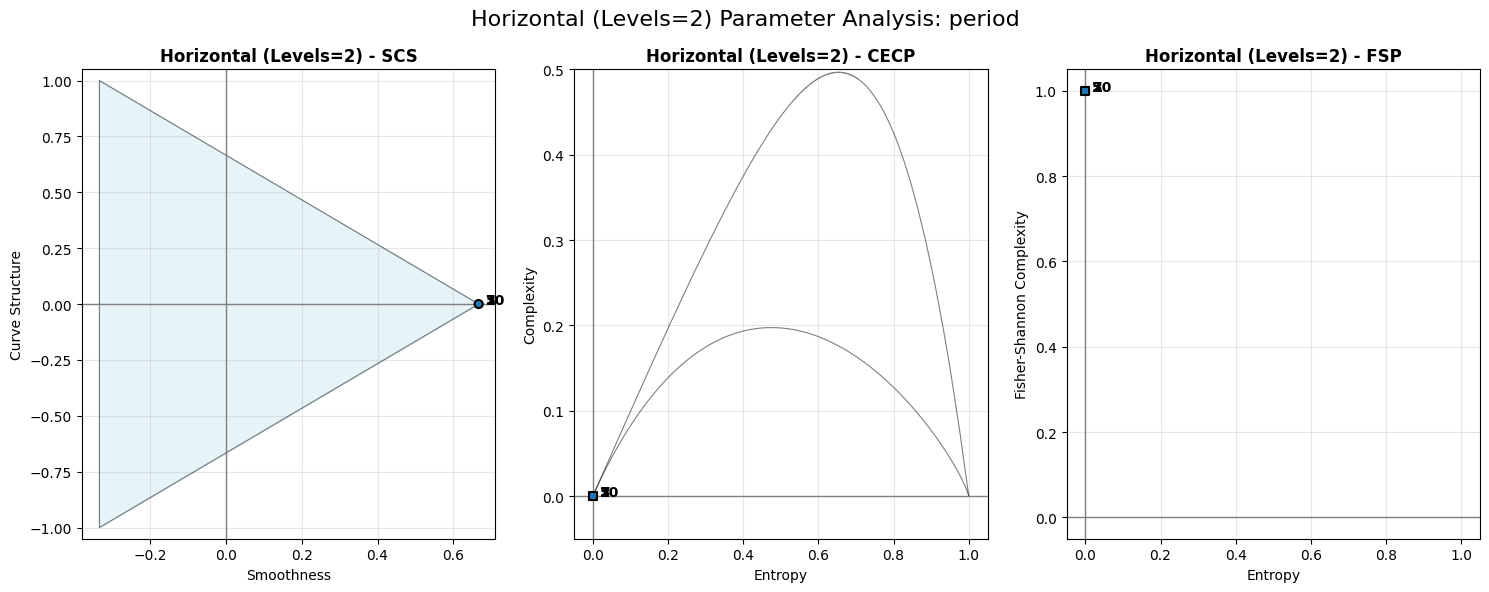

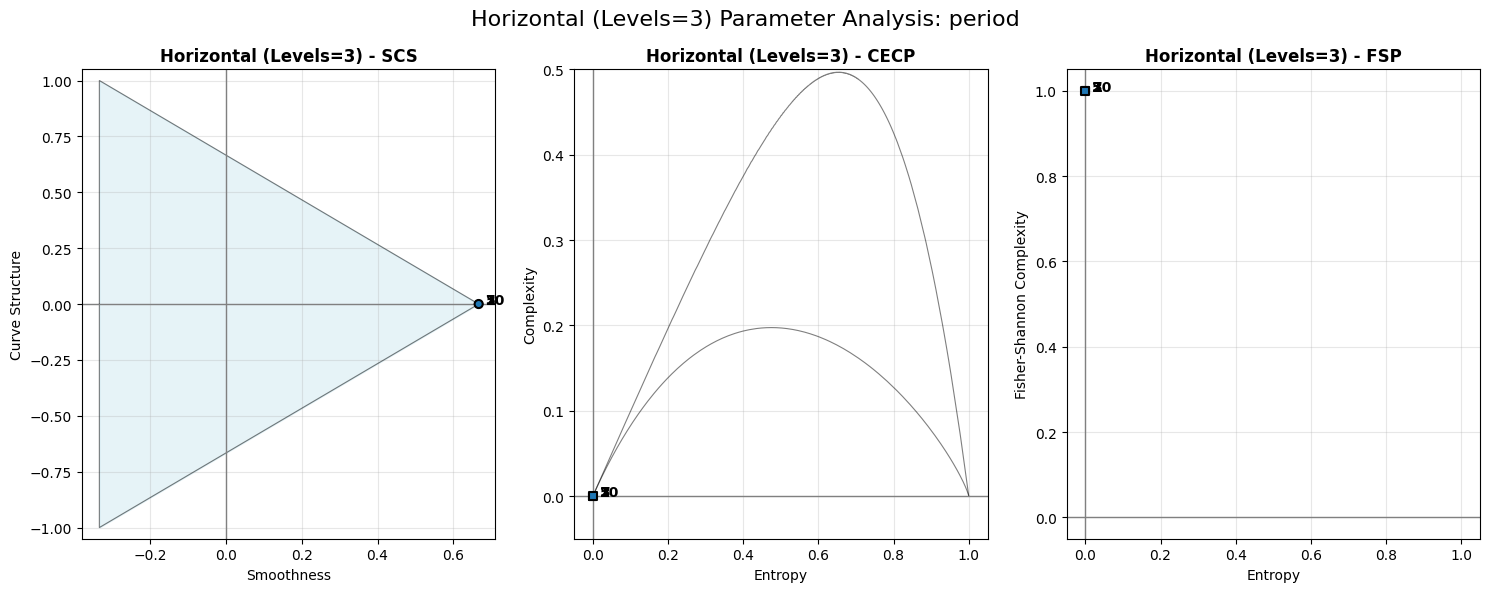

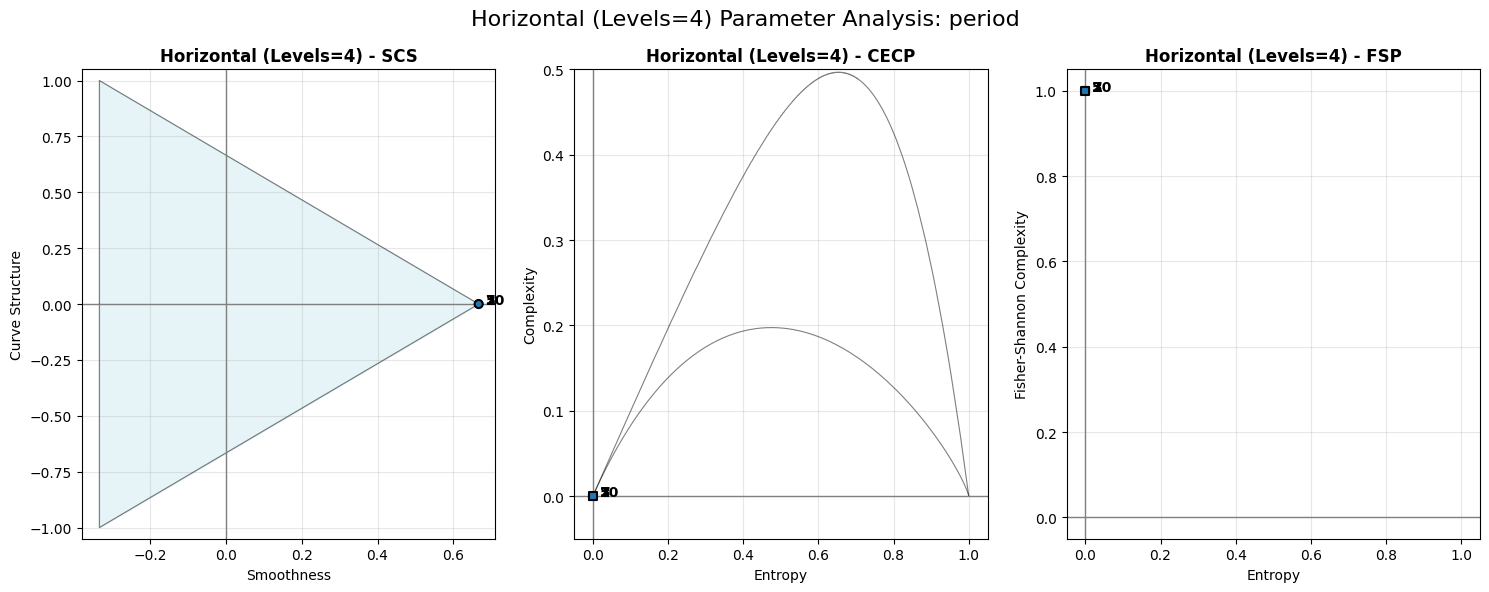

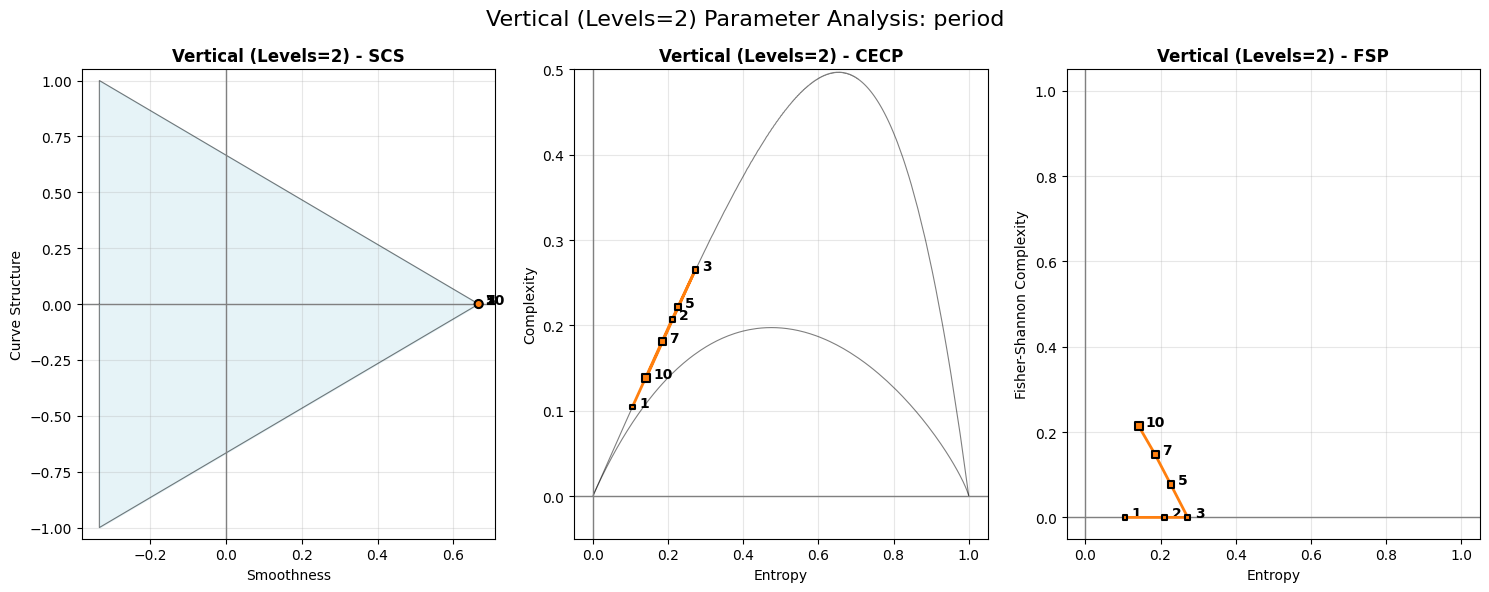

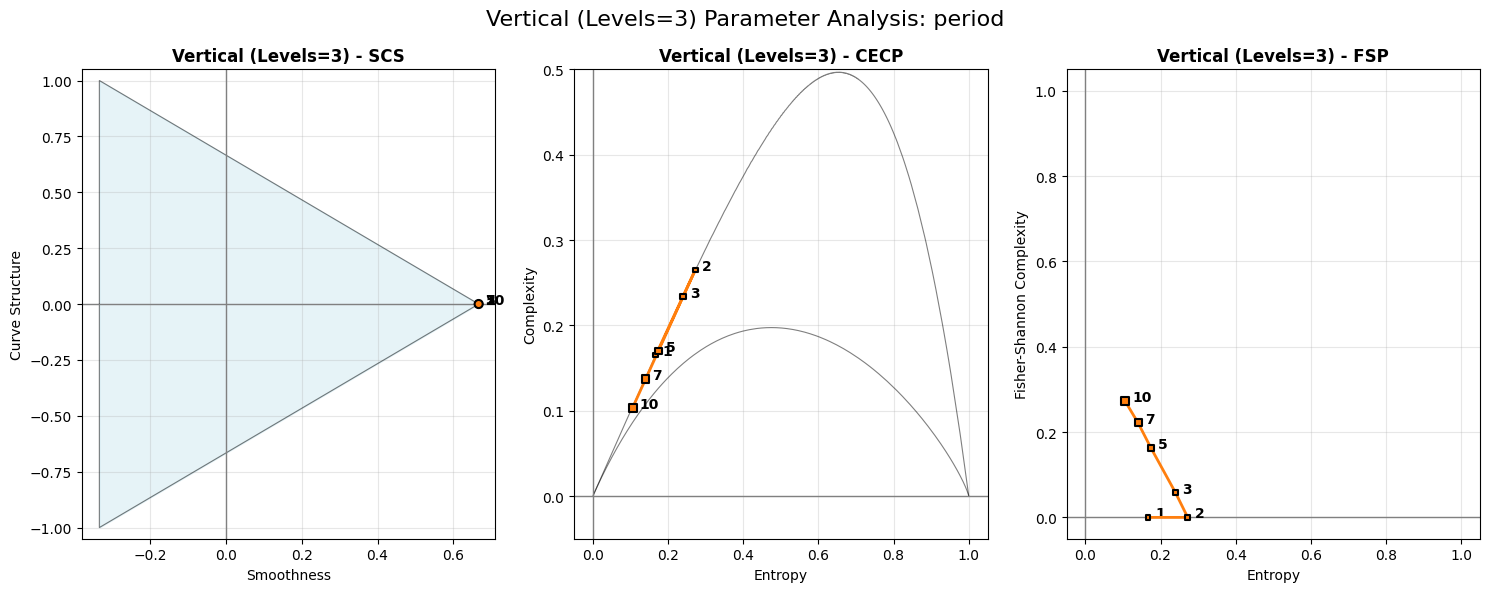

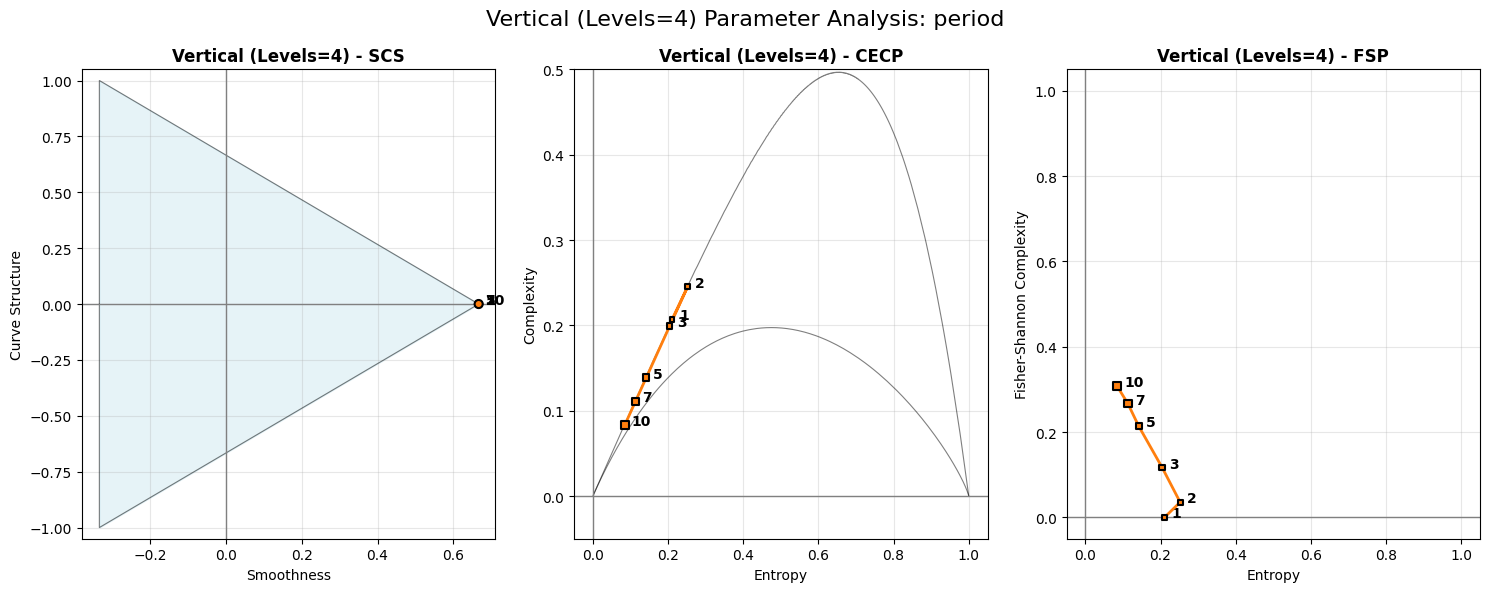

In [17]:
from utils.utils import read_entropy_complexity_limits

import matplotlib.pyplot as plt
import numpy as np

# Load CECP limits for the complexity-entropy plot
df_cont, df_troz = read_entropy_complexity_limits('data/limits/mv/', N=240)
df_cont, df_troz = read_entropy_complexity_limits('data/limits/unv/', N=720)

# Load SCSP limits for the smoothness-curve structure plot
df_scs = pd.read_csv('data/limits/SCSP/SCS_limits_steps1000.csv')

# Define colors for each image type
image_colors = {
    'horizontal': '#1f77b4',        # blue
    'vertical': '#ff7f0e',          # orange
    'diagonal': '#2ca02c',          # green
    'checkerboard': '#d62728',      # red
}
    
# Define consistent limits for all plots
scs_limits = (-0.38, 0.71, -1.05, 1.05) # xlim_min, xlim_max, ylim_min, ylim_max
cecp_limits = (-0.05, 1.05, -0.05, 0.5) # xlim_min, xlim_max, ylim_min, ylim_max
fsp_limits = (-0.05, 1.05, -0.05, 1.05) # xlim_min, xlim_max, ylim_min, ylim_max

# Create a separate figure for each image type and levels combination
for (image_name, level), group in image_data_df.groupby(['image_name', 'levels']):
    fig, (ax_scs, ax_cecp, ax_fsp) = plt.subplots(1, 3, figsize=(15, 6))
    
    # Sort data by parameter value
    group = group.sort_values('param_value')
    color = image_colors[image_name]
    
    # Format the label
    label = image_name.replace('_', ' ').title()
    if image_name == 'arnold':
        label = "Arnold's Cat Map"
    
    # Calculate marker sizes based on parameter values
    # Scale from 5 to 15 based on min and max parameter values
    param_min = group['param_value'].min()
    param_max = group['param_value'].max()
    marker_sizes = 5 + 12 * (group['param_value'] - param_min) / (param_max - param_min)
    
    # SCS plot with variable marker sizes
    ax_scs.scatter(group['Smoothness'], group['Curve structure'], 
               color=color, s=marker_sizes*2, marker='o', linewidth=1.5, 
               edgecolor='black', zorder=10)
    ax_scs.plot(group['Smoothness'], group['Curve structure'], 
               color=color, linestyle='-', linewidth=2, zorder=5)
    
    # CECP plot with variable marker sizes
    ax_cecp.scatter(group['Entropy'], group['Complexity'], 
                color=color, s=marker_sizes*2, marker='s', linewidth=1.5, 
                edgecolor='black', zorder=10)
    ax_cecp.plot(group['Entropy'], group['Complexity'], 
                color=color, linestyle='-', linewidth=2, zorder=5)
    
    # FSP plot with variable marker sizes: 'Shannon Entropy' X 'Fisher-Shannon Complexity'
    ax_fsp.scatter(group['Shannon Entropy'], group['Fisher-Shannon Complexity'], 
                color=color, s=marker_sizes*2, marker='s', linewidth=1.5, 
                edgecolor='black', zorder=10)
    ax_fsp.plot(group['Shannon Entropy'], group['Fisher-Shannon Complexity'], 
                color=color, linestyle='-', linewidth=2, zorder=5)
    
    # Add CECP limits to the CECP plot
    ax_cecp.plot(df_cont['HT'], df_cont['CJT'], color='black', linewidth=0.8, alpha=0.5)
    ax_cecp.plot(df_troz['HT'], df_troz['CJT'], color='black', linewidth=0.8, alpha=0.5)
    
    # Add SCS limits to the SCS plot
    ax_scs.plot(df_scs['Smoothness'], df_scs['Curve_Structure_Superior'], color='black', linewidth=0.8, alpha=0.5)
    ax_scs.plot(df_scs['Smoothness'], df_scs['Curve_Structure_Inferior'], color='black', linewidth=0.8, alpha=0.5)
    ax_scs.fill_between(df_scs['Smoothness'], df_scs['Curve_Structure_Inferior'], df_scs['Curve_Structure_Superior'], color='lightblue', alpha=0.3)
    
    # Add parameter values as annotations
    for _, row in group.iterrows():
        param_value = str(row['param_value'])
        
        # SCS point annotation
        ax_scs.annotate(f"{param_value}", 
                   xy=(row['Smoothness'], row['Curve structure']),
                   xytext=(5, 0), textcoords='offset points', 
                   fontsize=10, color='black', fontweight='bold')
        
        # CECP point annotation
        ax_cecp.annotate(f"{param_value}", 
                        xy=(row['Entropy'], row['Complexity']),
                        xytext=(5, 0), textcoords='offset points', 
                        fontsize=10, color='black', fontweight='bold')
        
        # FSP point annotation
        ax_fsp.annotate(f"{param_value}", 
                        xy=(row['Shannon Entropy'], row['Fisher-Shannon Complexity']),
                        xytext=(5, 0), textcoords='offset points', 
                        fontsize=10, color='black', fontweight='bold')
    
    # Set axis labels and limits
    ax_scs.set_title(f"{label} (Levels={level}) - SCS", fontweight='bold')
    ax_scs.set_xlabel('Smoothness')
    ax_scs.set_ylabel('Curve Structure')
    ax_scs.set_xlim(scs_limits[0], scs_limits[1])
    ax_scs.set_ylim(scs_limits[2], scs_limits[3])
    
    ax_cecp.set_title(f"{label} (Levels={level}) - CECP", fontweight='bold')
    ax_cecp.set_xlabel('Entropy')
    ax_cecp.set_ylabel('Complexity')
    ax_cecp.set_xlim(cecp_limits[0], cecp_limits[1])
    ax_cecp.set_ylim(cecp_limits[2], cecp_limits[3])
    
    ax_fsp.set_title(f"{label} (Levels={level}) - FSP", fontweight='bold')
    ax_fsp.set_xlabel('Entropy')
    ax_fsp.set_ylabel('Fisher-Shannon Complexity')
    ax_fsp.set_xlim(fsp_limits[0], fsp_limits[1])
    ax_fsp.set_ylim(fsp_limits[2], fsp_limits[3])
    
    # Add grid and reference lines
    ax_scs.grid(True, alpha=0.3)
    ax_scs.axhline(y=0, lw=1, color='gray')
    ax_scs.axvline(x=0, lw=1, color='gray')
    ax_cecp.grid(True, alpha=0.3)
    ax_cecp.axhline(y=0, lw=1, color='gray')
    ax_cecp.axvline(x=0, lw=1, color='gray')
    ax_fsp.grid(True, alpha=0.3)
    ax_fsp.axhline(y=0, lw=1, color='gray')
    ax_fsp.axvline(x=0, lw=1, color='gray')
    
    # Add parameter name info
    param_name = group['param_name'].iloc[0]
    fig.suptitle(f"{label} (Levels={level}) Parameter Analysis: {param_name}", fontsize=16)
    
    plt.tight_layout()
    # plt.savefig(f'results/{image_name}_level{level}_parameter_analysis.png', bbox_inches='tight', dpi=300)
    plt.show()
